<ipython-input-13-6bfb3ef99c36>:35: DtypeWarning: Columns (6,20,31,46,69,74) have mixed types. Specify dtype option on import or set low_memory=False.
  stations = pd.read_csv("/content/drive/MyDrive/projectDApython/evChargingStations.csv")  # Adjust filename if needed


                   State  EV_2022  EV_2023  Charger_Stations  EV_Growth (%)
0           North Dakota      600     1000                96          66.67
1              Wisconsin    15700    24900               726          58.60
2               Maryland    46100    72100              1506          56.40
3               Delaware     5400     8400               269          55.56
4               New York    84700   131300              4706          55.02
5             New Jersey    87000   134800              1558          54.94
6         South Carolina    13500    20900               652          54.81
7                  Texas   149000   230100              3771          54.43
8         North Carolina    45600    70200              1787          53.95
9                Georgia    60100    92400              2129          53.74
10             Minnesota    24300    37100               995          52.67
11              Kentucky     7600    11600               346          52.63
12          

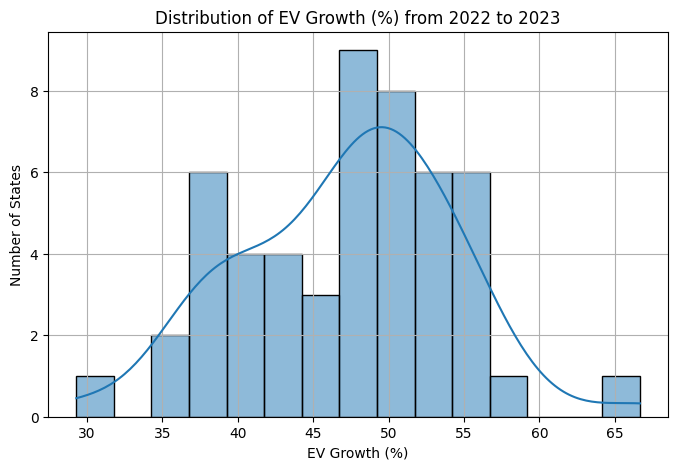

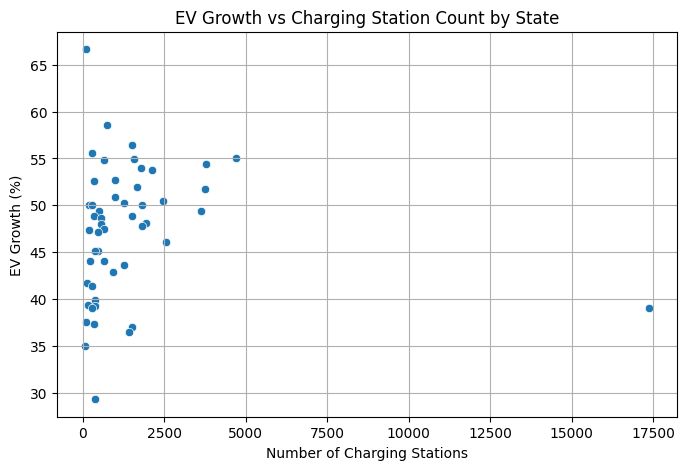

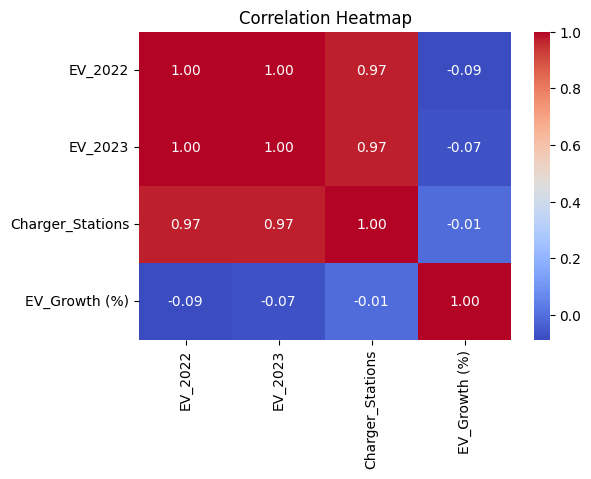


                            OLS Regression Results                            
Dep. Variable:          EV_Growth (%)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                  0.004995
Date:                Tue, 15 Apr 2025   Prob (F-statistic):              0.944
Time:                        00:30:10   Log-Likelihood:                -171.40
No. Observations:                  51   AIC:                             346.8
Df Residuals:                      49   BIC:                             350.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               47.2755      1.145 

In [13]:
# Part 1 - Data cleaning and merging

import pandas as pd

# Dictionary to convert state abbreviations to full names
us_state_abbrev = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota',
    'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}


# Load and Clean EV Registration Data for 2022
ev_2022 = pd.read_csv("/content/drive/MyDrive/projectDApython/evVehicles2022.csv", skiprows=1, usecols=[0, 1])
ev_2022.columns = ['State', 'EV_2022']
ev_2022['State'] = ev_2022['State'].str.strip()
ev_2022['EV_2022'] = ev_2022['EV_2022'].str.replace(',', '').astype(int)

# Load and Clean EV Registration Data for 2023
ev_2023 = pd.read_csv("/content/drive/MyDrive/projectDApython/evVihicles2023.csv", skiprows=1, usecols=[0, 1])
ev_2023.columns = ['State', 'EV_2023']
ev_2023['State'] = ev_2023['State'].str.strip()
ev_2023['EV_2023'] = ev_2023['EV_2023'].str.replace(',', '').astype(int)

# Load and Count Charging Stations per State
stations = pd.read_csv("/content/drive/MyDrive/projectDApython/evChargingStations.csv")  # Adjust filename if needed
station_counts = stations['State'].value_counts().reset_index()
station_counts.columns = ['State', 'Charger_Stations']

# Convert abbreviations to full state names
station_counts['State'] = station_counts['State'].map(us_state_abbrev)

# Normalize state column across all datasets
ev_2022['State'] = ev_2022['State'].str.strip().str.title()
ev_2023['State'] = ev_2023['State'].str.strip().str.title()
station_counts['State'] = station_counts['State'].str.strip().str.title()

#  Merge the Datasets
merged = pd.merge(ev_2022, ev_2023, on='State', how='inner')
merged = pd.merge(merged, station_counts, on='State', how='inner')

# Calculate EV Growth Rate from 2022 to 2023
merged['EV_Growth (%)'] = ((merged['EV_2023'] - merged['EV_2022']) / merged['EV_2022']) * 100
merged = merged.sort_values(by='EV_Growth (%)', ascending=False)

# Display Result
print(merged.reset_index(drop=True).head(51))
print()





# Part 2 - Descriptive Analytics and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
print("Descriptive Statistics:")
pd.set_option('display.float_format', '{:,.2f}'.format)
print(merged.describe())

# Histogram – EV Growth Distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged['EV_Growth (%)'], kde=True, bins=15)
plt.title("Distribution of EV Growth (%) from 2022 to 2023")
plt.xlabel("EV Growth (%)")
plt.ylabel("Number of States")
plt.grid(True)
plt.show()

# Scatter Plot – Charging Stations vs EV Growth
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged, x='Charger_Stations', y='EV_Growth (%)')
plt.title("EV Growth vs Charging Station Count by State")
plt.xlabel("Number of Charging Stations")
plt.ylabel("EV Growth (%)")
plt.grid(True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6, 4))
corr = merged[['EV_2022', 'EV_2023', 'Charger_Stations', 'EV_Growth (%)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()






#Part 3 -
print()
import statsmodels.api as sm
# Step 1: Define X and y
X = merged['Charger_Stations']
y = merged['EV_Growth (%)']
# Step 2: Add constant term for intercept
X = sm.add_constant(X)
# Step 3: Fit regression model
model = sm.OLS(y, X).fit()
# Step 4: View results
print(model.summary())
